# TP 2 - Projet






In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
from skimage.morphology import dilation, erosion, disk
from skimage import morphology, segmentation, measure
from skimage.morphology import extrema
from skimage.segmentation import watershed
from skimage.morphology import skeletonize, remove_small_objects, reconstruction

# 1. Otsu -> Top Hat

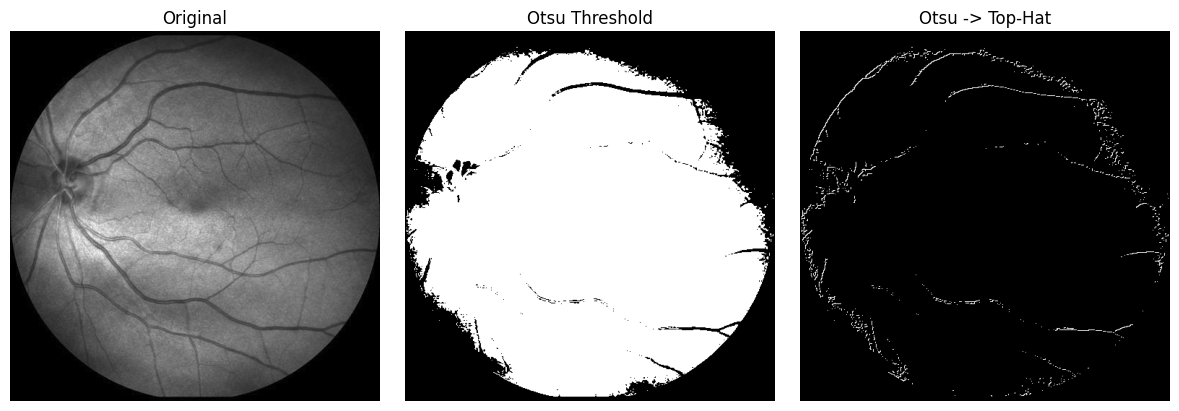

In [5]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 1. Otsu
thresh = threshold_otsu(image)
otsu_threshold = (image > thresh).astype(np.uint8)

# 2. Top-Hat
kernel = np.ones((2, 2), np.uint8)
top_hat_threshold = cv2.morphologyEx(otsu_threshold, cv2.MORPH_TOPHAT, kernel)

titles = ['Original', 'Otsu Threshold', 'Otsu -> Top-Hat']
images = [image, otsu_threshold, top_hat_threshold]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Invert image

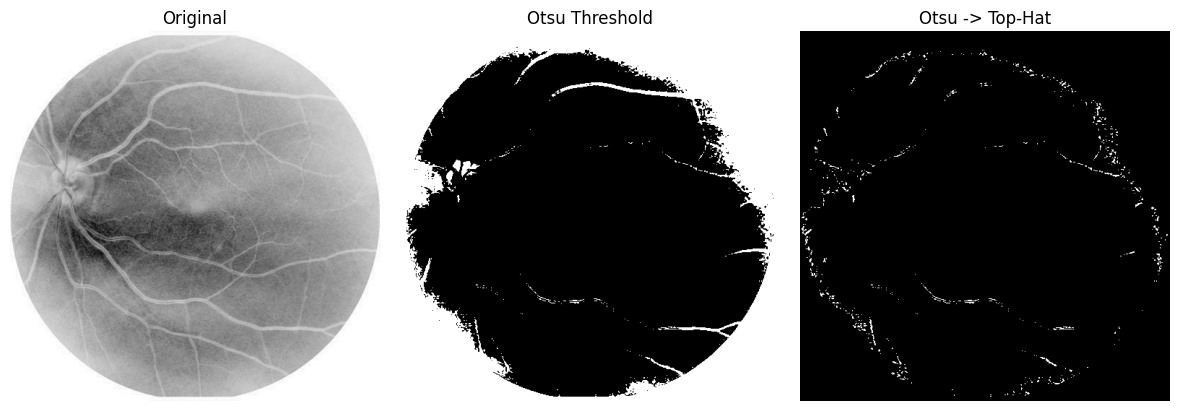

Image saved : /content/star01_OSC_1.png


In [6]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# invert
image = 255 - image

# 1. Otsu
thresh = threshold_otsu(image)
otsu_threshold = (image > thresh).astype(np.uint8)

# 2. Top-Hat
kernel = np.ones((3, 3), np.uint8)
top_hat_otsu = cv2.morphologyEx(otsu_threshold, cv2.MORPH_TOPHAT, kernel)

titles = ['Original', 'Otsu Threshold', 'Otsu -> Top-Hat']
images = [image, otsu_threshold, top_hat_otsu*255]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

output_path = "/content/star01_OSC_1.png"
cv2.imwrite(output_path, top_hat_otsu)
print("Image saved :", output_path)


# 2. Top-Hat -> Otsu

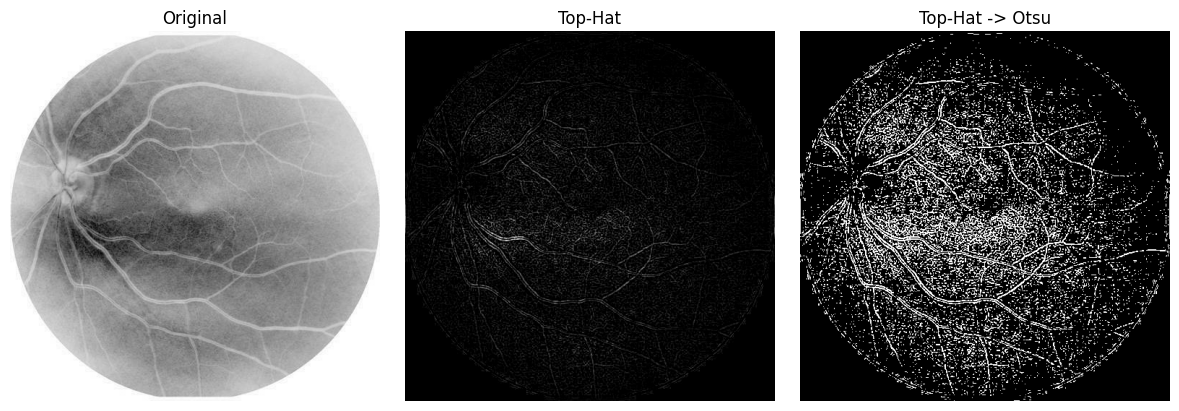

In [7]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# invert
image = 255 - image

# 1. Top-Hat
top_hat_original = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# 2. Otsu
thresh = threshold_otsu(top_hat_original)
binary_01 = (top_hat_original > thresh).astype(np.uint8)

# 5. Conversion en 0–255 (OBLIGATOIRE)
binary_255 = binary_01 * 255


# Affichage des résultats
titles = ['Original', 'Top-Hat', 'Top-Hat -> Otsu']
images = [image, top_hat_original, binary_255]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


# 3. Top-Hat -> Otsu -> Denoise

## Open

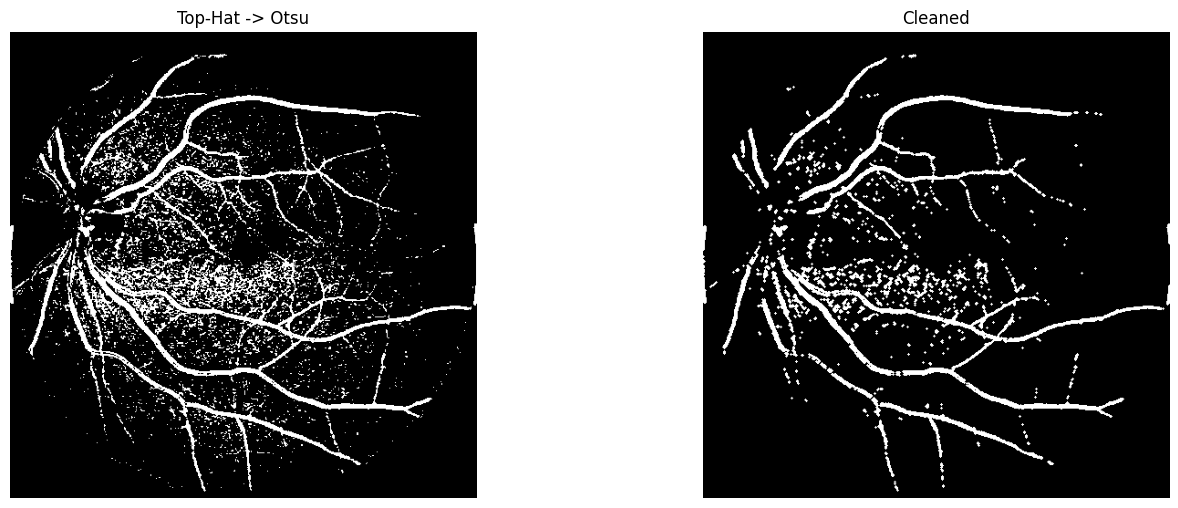

Image saved !


In [9]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# invert
image_inv = 255 - image

# 1. Top-Hat
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
top_hat = cv2.morphologyEx(image_inv, cv2.MORPH_TOPHAT, kernel)

# 2. Otsu
thresh = threshold_otsu(top_hat)
binary_01 = (top_hat > thresh).astype(np.uint8)
binary_255 = binary_01 * 255

# 3. Denoised - Open
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cleaned = cv2.morphologyEx(binary_255, cv2.MORPH_OPEN, kernel_open)

images = [
    binary_255,
    cleaned
]

titles = [
    "Top-Hat -> Otsu",
    "Cleaned"
]

plt.figure(figsize=(14, 10))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("/content/star01_OSC_3.png", cleaned)
print("Image saved !")


## Median Blur

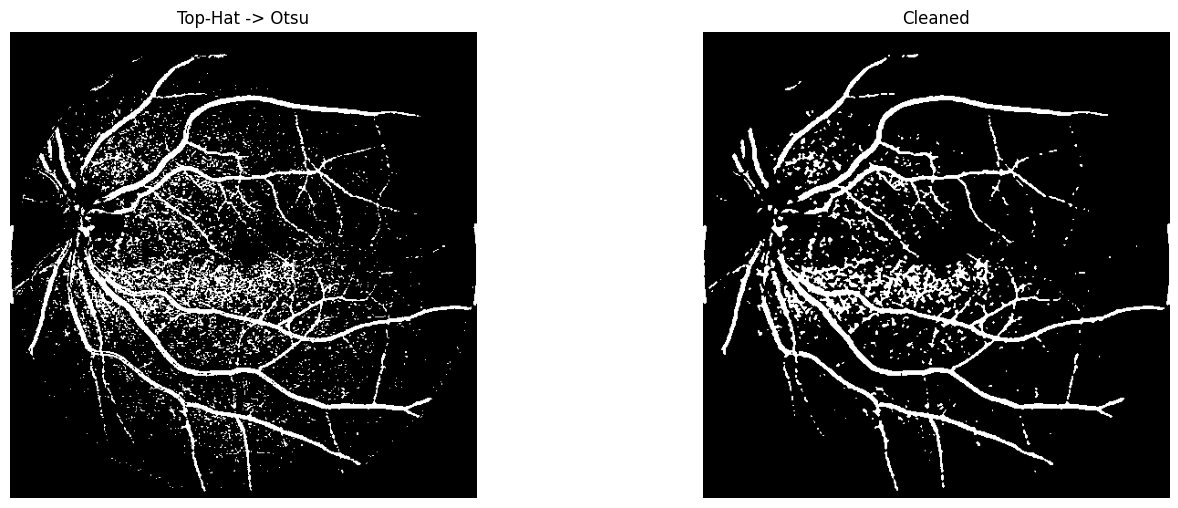

Image saved !


In [10]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# invert
image_inv = 255 - image

# 1. Top-Hat
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
top_hat = cv2.morphologyEx(image_inv, cv2.MORPH_TOPHAT, kernel)

# 2. Otsu
thresh = threshold_otsu(top_hat)
binary_01 = (top_hat > thresh).astype(np.uint8)
binary_255 = binary_01 * 255

# 3. Denoised - Open
cleaned = cv2.medianBlur(binary_255, 3)

images = [
    binary_255,
    cleaned
]

titles = [
    "Top-Hat -> Otsu",
    "Cleaned"
]

plt.figure(figsize=(14, 10))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("/content/star01_OSC_4.png", cleaned)
print("Image saved !")



# Manual threshold : Top-Hat -> Otsu -> denoise (open)

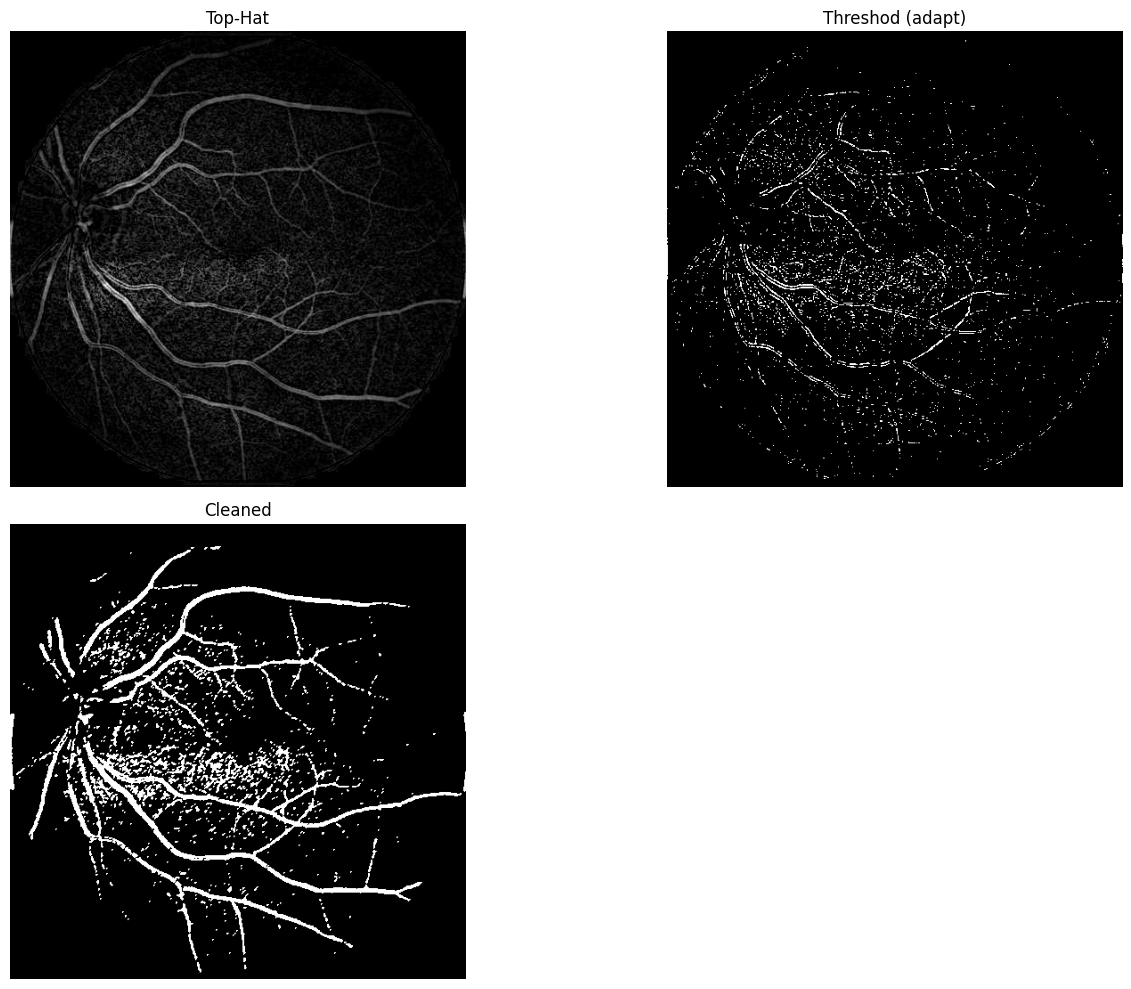

Image saved !


In [18]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# invert
image_inv = 255 - image

# 1. Top-Hat
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
top_hat = cv2.morphologyEx(image_inv, cv2.MORPH_TOPHAT, kernel)

# 2. thresholding
adaptive = cv2.adaptiveThreshold(
    top_hat_original, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=21,
    C=-7
)

# 3. Denoised - Open
# cleaned = cv2.medianBlur(adaptive, 3)
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
cleaned = cv2.morphologyEx(binary_255, cv2.MORPH_OPEN, kernel_open)

images = [
    top_hat,
    adaptive,
    cleaned
]

titles = [
    "Top-Hat",
    "Threshod (adapt)",
    "Cleaned"
]

plt.figure(figsize=(14, 10))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("/content/star01_OSC_6.png", cleaned)
print("Image saved !")



# gradient -> denoise

In [ ]:
image_path = "/content/star01_OSC.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# invert
image = 255 - image

# 1. Gradient
radius = 2
grad = dilation(image, disk(radius)) - erosion(image, disk(radius))

# 2. Extract high transition
vessels = (grad > np.percentile(grad, 90)).astype(np.uint8) * 255

# clean
vessels_cleaned = cv2.medianBlur(vessels, 5)

output_path = "/content/star01_OSC_grad.png"
cv2.imwrite(output_path, vessels_cleaned)
print("Image enregistrée :", output_path)

titles = [
    "Original invert",
    "Gradient",
    "Vessels",
    "Vaisseaux clean"
]

images = [
    image,
    grad,
    vessels,
    vessels_cleaned
]

plt.figure(figsize=(16, 12))
for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    cmap = "gray" if len(images[i].shape) == 2 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


# CLAHE -> Vesselness -> Threshold -> reconstruction -> clean

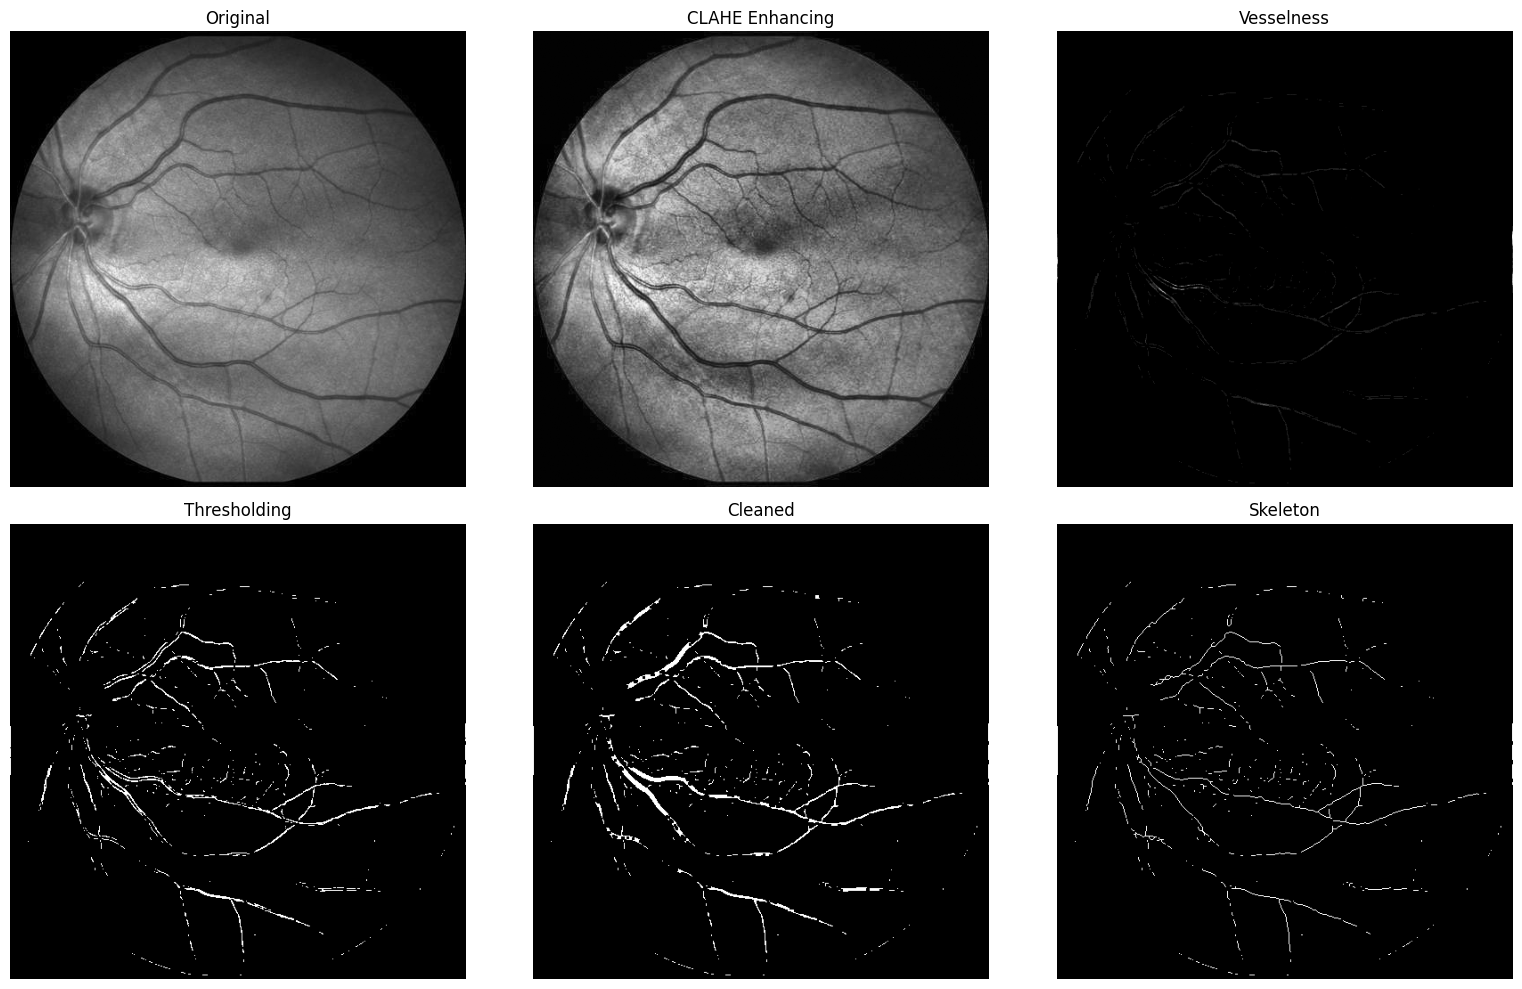

Image enregistrée : /content/star01_OSC_frangi.png


In [13]:
image_path = '/content/star01_OSC.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(image)

# Frangi filter

def vesselness(img, sigmas=[1, 1.5, 2, 3]):
    img = img.astype(np.float32) / 255.0
    vessel = np.zeros_like(img)

    for sigma in sigmas:
        dxx = cv2.GaussianBlur(img, (0,0), sigma, borderType=cv2.BORDER_REPLICATE)
        dxx = cv2.Sobel(dxx, cv2.CV_32F, 2, 0, ksize=3)

        dyy = cv2.GaussianBlur(img, (0,0), sigma, borderType=cv2.BORDER_REPLICATE)
        dyy = cv2.Sobel(dyy, cv2.CV_32F, 0, 2, ksize=3)

        dxy = cv2.GaussianBlur(img, (0,0), sigma, borderType=cv2.BORDER_REPLICATE)
        dxy = cv2.Sobel(dxy, cv2.CV_32F, 1, 1, ksize=3)

        delta = np.sqrt((dxx - dyy)**2 + 4 * dxy**2)
        lambda1 = 0.5 * (dxx + dyy - delta)
        lambda2 = 0.5 * (dxx + dyy + delta)

        beta = 1
        c = 5

        Rb = (lambda1 / (lambda2 + 1e-6))**2
        S = lambda1**2 + lambda2**2

        v = np.exp(-Rb / (2 * beta**2)) * (1 - np.exp(-S / (2 * c**2)))

        vessel = np.maximum(vessel, v)

    vessel = (255 * vessel / vessel.max()).astype(np.uint8)
    return vessel

vesselness = vesselness(enhanced)

# Seuillage
binary = cv2.adaptiveThreshold(
    vesselness, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=21,
    C=-2
)

#  dilatation
seed = cv2.erode(binary, np.ones((1,1), np.uint8))
seed = seed.astype(np.uint8)
mask = binary.astype(np.uint8)

recons = reconstruction(seed, mask, method='dilation')
recons = (recons > 0.8).astype(np.uint8) * 255
clean = remove_small_objects(recons.astype(bool), min_size=40)
clean = clean.astype(np.uint8) * 255
clean = cv2.morphologyEx(recons, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

#skeleton
skeleton = skeletonize(clean // 255)
skeleton = (skeleton * 255).astype(np.uint8)

titles = [
    'Original',
    'CLAHE Enhancing',
    'Vesselness',
    'Thresholding',
    'Cleaned',
    'Skeleton'
]

images = [
    image,
    enhanced,
    vesselness,
    binary,
    clean,
    skeleton
]

plt.figure(figsize=(16, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

output_path = "/content/star01_OSC_frangi.png"
cv2.imwrite(output_path, clean)
print("Image enregistrée :", output_path)


# Evaluation

(512, 512)
Accuracy = 0.8222782984859409 , Recall = 0.3705328135152697 mean =  0.5964055560006053


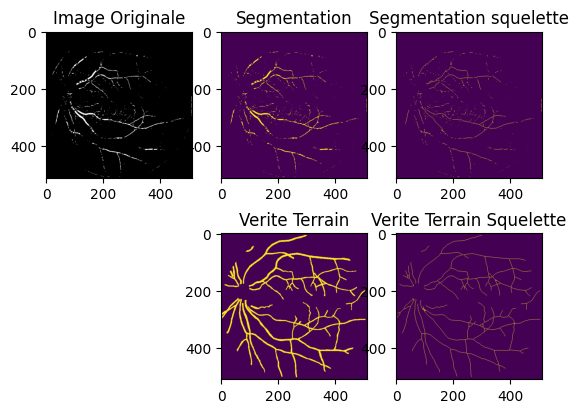

In [14]:
import numpy as np
from skimage.morphology import erosion, dilation, binary_erosion, opening, closing, white_tophat, reconstruction, black_tophat, skeletonize, convex_hull_image, thin
from skimage.morphology import square, diamond, octagon, rectangle, star, disk
from skimage.filters.rank import entropy, enhance_contrast_percentile
from PIL import Image
from scipy import ndimage as ndi
from skimage.util import img_as_ubyte
import math
from skimage import data, filters
from matplotlib import pyplot as plt

def my_segmentation(img, img_mask, seuil):
    img_out = (img_mask & (img > seuil))
    return img_out

def evaluate(img_out, img_GT):
    GT_skel = skeletonize(img_GT) # On reduit le support de l'evaluation...
    img_out_skel = skeletonize(img_out) # ...aux pixels des squelettes
    TP = np.sum(img_out_skel & img_GT) # Vrais positifs
    FP = np.sum(img_out_skel & ~img_GT) # Faux positifs
    FN = np.sum(GT_skel & ~img_out) # Faux negatifs

    ACCU = TP / (TP + FP) # Precision
    RECALL = TP / (TP + FN) # Rappel
    return ACCU, RECALL, img_out_skel, GT_skel

#Ouvrir l'image originale en niveau de gris
img =  np.asarray(Image.open('/content/star01_OSC_frangi.png')).astype(np.uint8)
print(img.shape)

nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
#On ne considere que les pixels dans le disque inscrit
img_mask = (np.ones(img.shape)).astype(np.bool_)
invalid_pixels = ((row - nrows/2)**2 + (col - ncols/2)**2 > (nrows / 2)**2)
img_mask[invalid_pixels] = 0

img_out = my_segmentation(img,img_mask,80)


#Ouvrir l'image Verite Terrain en booleen
img_GT =  np.asarray(Image.open('/content/GT_01.png')).astype(np.bool_)
# Si image RGB → convertit en gris
if img_GT.ndim == 3:
    img_GT = rgb2gray(img_GT)

# Binarisation propre (GT est blanc = 1, noir = 0)
img_GT = img_GT > 0.5

ACCU, RECALL, img_out_skel, GT_skel = evaluate(img_out, img_GT)
print('Accuracy =', ACCU,', Recall =', RECALL, 'mean = ', (ACCU+RECALL)/2)

plt.subplot(231)
plt.imshow(img,cmap = 'gray')
plt.title('Image Originale')
plt.subplot(232)
plt.imshow(img_out)
plt.title('Segmentation')
plt.subplot(233)
plt.imshow(img_out_skel)
plt.title('Segmentation squelette')
plt.subplot(235)
plt.imshow(img_GT)
plt.title('Verite Terrain')
plt.subplot(236)
plt.imshow(GT_skel)
plt.title('Verite Terrain Squelette')
plt.show()

